In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
Student_Data = pd.read_csv('StudentPerformanceFactors.csv')

# **Data Exploring**

In [7]:
Student_Data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
Student_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
Student_Data.isna().sum()


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


**Handling NULLS**

In [10]:
Student_Data = Student_Data.fillna(Student_Data.mode().iloc[0])

In [11]:
Student_Data.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


**Data Categorization**

In [12]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                   'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
                   'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

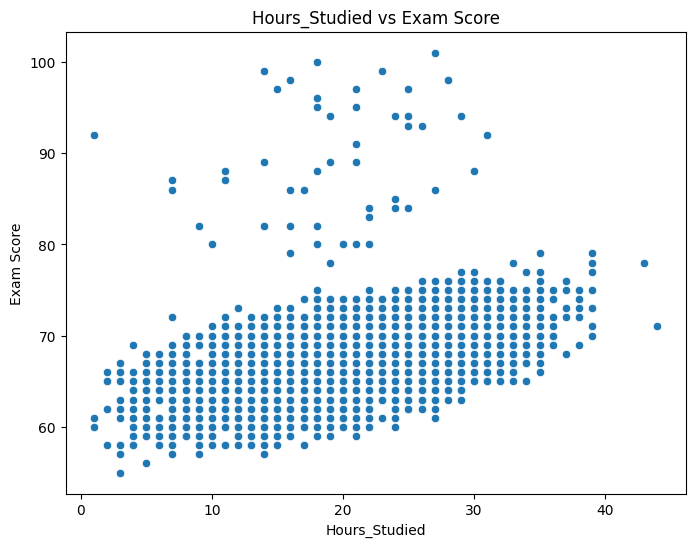

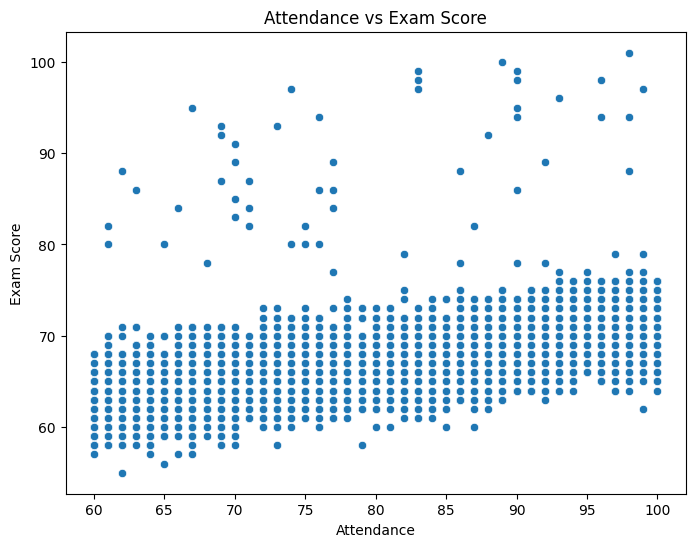

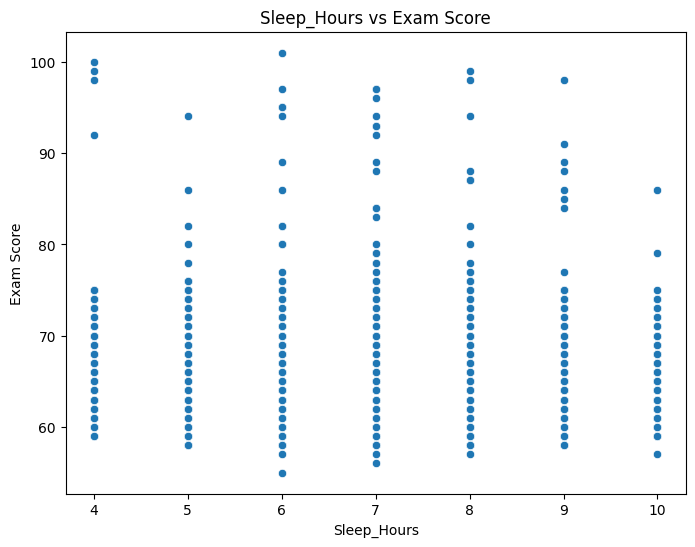

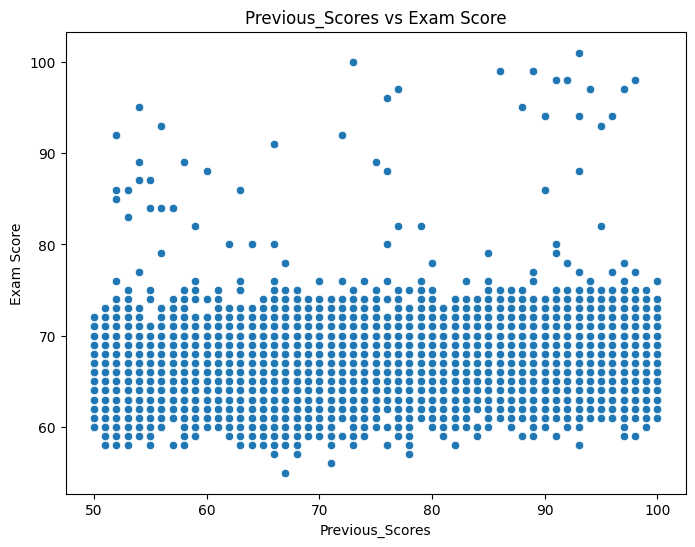

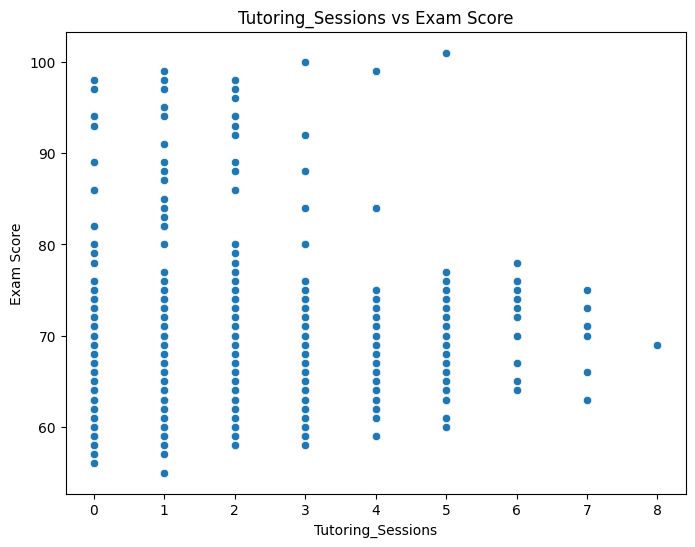

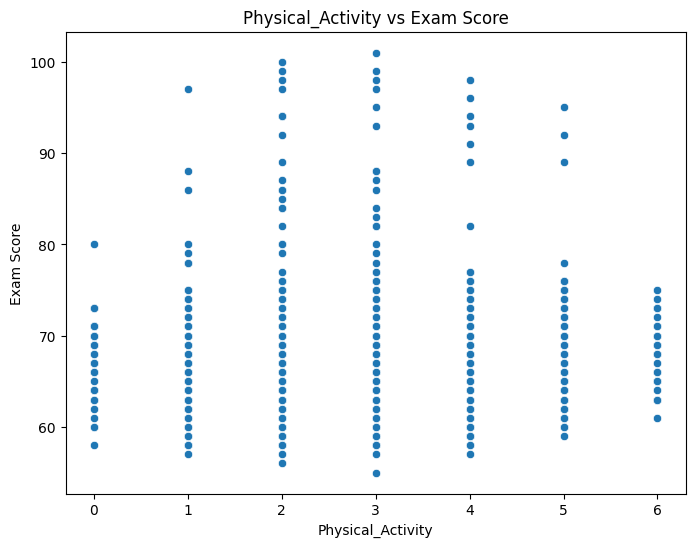

In [14]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=Student_Data[col], y=Student_Data['Exam_Score'])
    plt.title(f'{col} vs Exam Score')
    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.show()

# **Feature Selection**

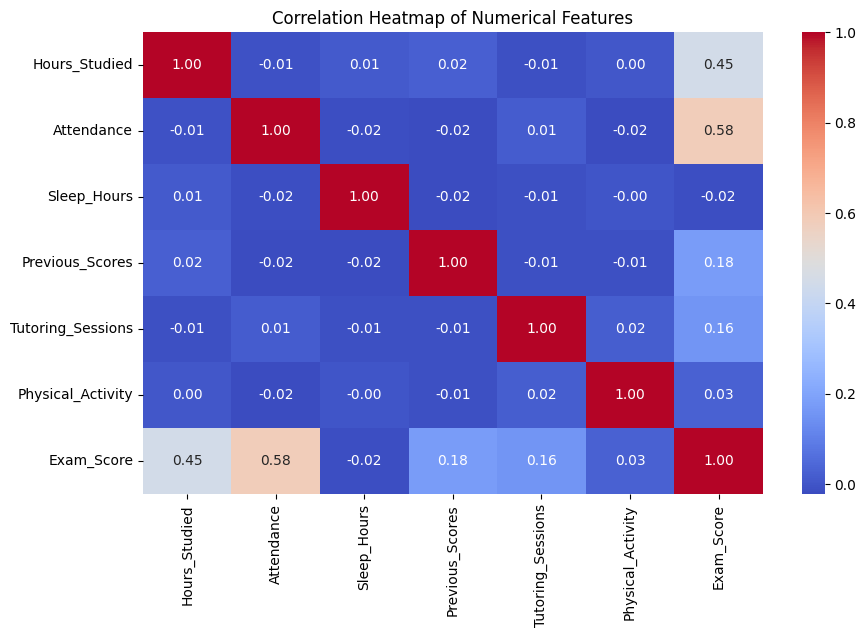

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(Student_Data[numerical_cols + ['Exam_Score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

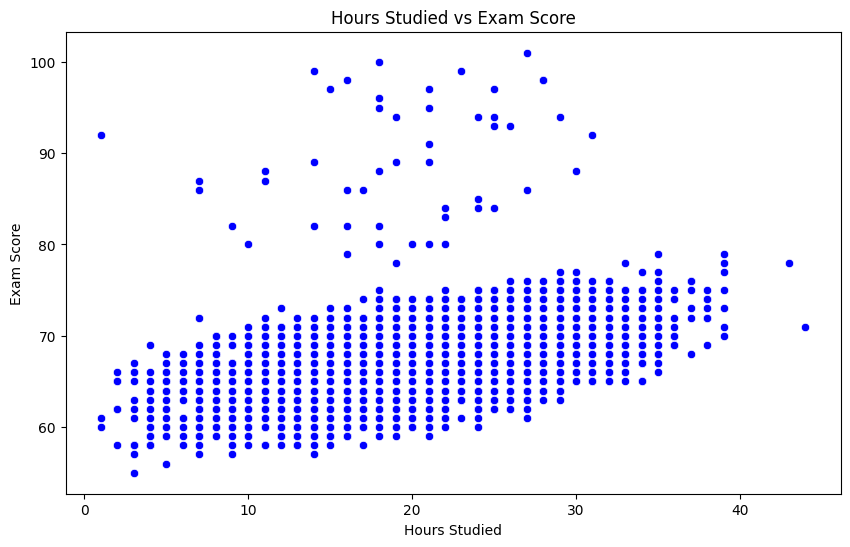

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=Student_Data, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')
plt.savefig('hours_vs_score.png')
plt.show()

# **Models**

In [18]:
X_simple = Student_Data[['Hours_Studied']]
y = Student_Data['Exam_Score']
X_multi = Student_Data[numerical_cols]

X_simple_train, X_simple_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_multi_train, X_multi_test, _, _ = train_test_split(X_multi, y, test_size=0.2, random_state=42)

**Linear** **Regression**

In [19]:
LinearReg = LinearRegression()
LinearReg.fit(X_simple_train, y_train)
y_pred_lr = LinearReg.predict(X_simple_test)
mse_linear = mean_squared_error(y_test, y_pred_lr)
r2_linear = r2_score(y_test, y_pred_lr)
print(f'Linear Regression (Hours_Studied):')
print(f'Mean Squared Error: {mse_linear:.2f}')
print(f'R^2 Score: {r2_linear:.2f}')

Linear Regression (Hours_Studied):
Mean Squared Error: 10.86
R^2 Score: 0.23


In [ ]:
X_test_sorted = np.sort(X_simple_test['Hours_Studied'].values)
y_pred_lr_sorted = LinearReg.predict(X_simple_test.sort_values('Hours_Studied'))

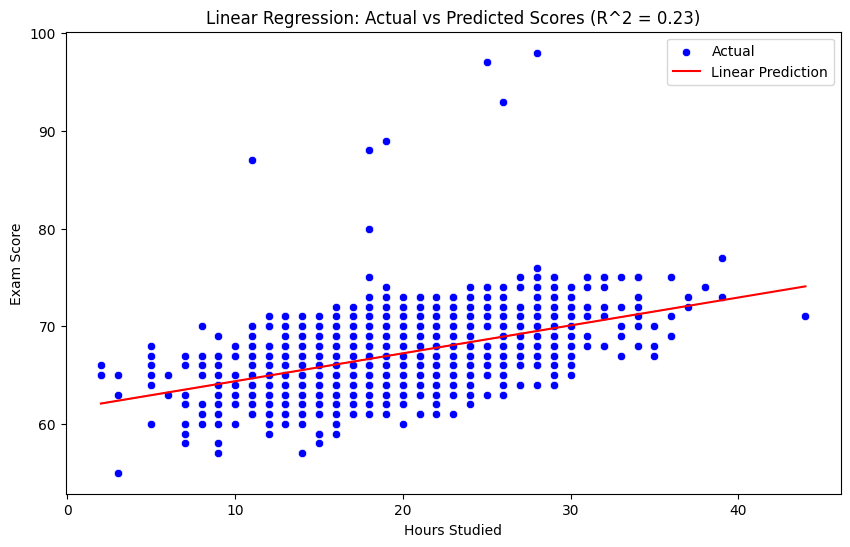

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_simple_test['Hours_Studied'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test_sorted, y=y_pred_lr_sorted, color='red', label='Linear Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title(f'Linear Regression: Actual vs Predicted Scores (R^2 = {r2_linear:.2f})')
plt.legend()
plt.savefig('linear_prediction.png')
plt.show()

**Polynomial Regression**

In [ ]:
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_simple_train, y_train)
y_pred_poly = polyreg.predict(X_simple_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [21]:
print(f'\nPolynomial Regression (Degree {degree}, Hours_Studied):')
print(f'Mean Squared Error: {mse_poly:.2f}')
print(f'R^2 Score: {r2_poly:.2f}')


Polynomial Regression (Degree 2, Hours_Studied):
Mean Squared Error: 10.84
R^2 Score: 0.23


In [ ]:
y_pred_poly_sorted = polyreg.predict(X_simple_test.sort_values('Hours_Studied'))

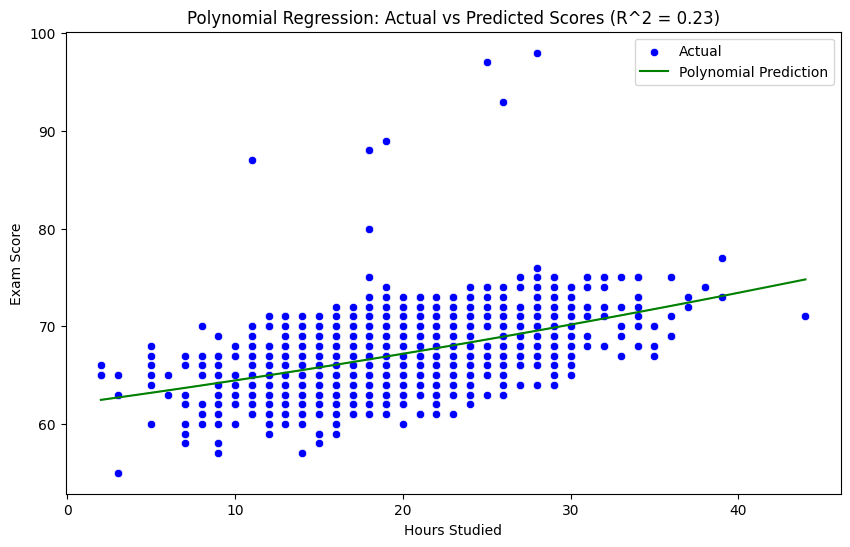

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_simple_test['Hours_Studied'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test_sorted, y=y_pred_poly_sorted, color='green', label='Polynomial Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title(f'Polynomial Regression: Actual vs Predicted Scores (R^2 = {r2_poly:.2f})')
plt.legend()
plt.savefig('polynomial_prediction.png')
plt.show()

**Multiple Features Linear Regression**

In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_multi_train, y_train)
y_pred_multi = multi_model.predict(X_multi_test)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

In [23]:
print(f'\nLinear Regression (Multiple Features):')
print(f'Mean Squared Error: {mse_multi:.2f}')
print(f'R^2 Score: {r2_multi:.2f}')


Linear Regression (Multiple Features):
Mean Squared Error: 5.07
R^2 Score: 0.64


In [ ]:
X_test_sorted = np.sort(X_simple_test['Hours_Studied'].values)
X_multi_synthetic = pd.DataFrame({col: np.full_like(X_test_sorted, X_multi_train[col].mean()) for col in numerical_cols})
X_multi_synthetic['Hours_Studied'] = X_test_sorted
y_pred_multi_sorted = multi_model.predict(X_multi_synthetic)

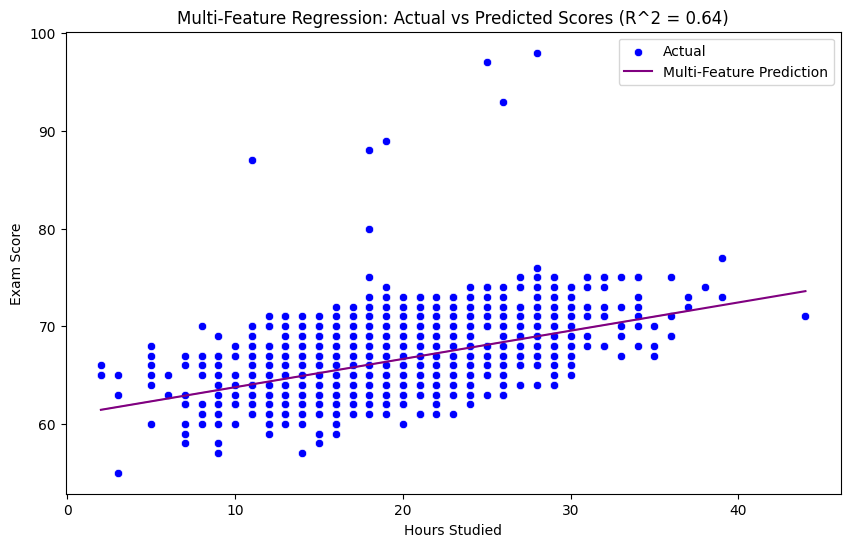

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_simple_test['Hours_Studied'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test_sorted, y=y_pred_multi_sorted, color='purple', label='Multi-Feature Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title(f'Multi-Feature Regression: Actual vs Predicted Scores (R^2 = {r2_multi:.2f})')
plt.legend()
plt.savefig('multi_feature_prediction.png')
plt.show()

**Selected Features Linear Regression**

In [ ]:
selected_features = ['Hours_Studied', 'Attendance', 'Previous_Scores']
X_selected = Student_Data[selected_features]
X_selected_train, X_selected_test, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [26]:
selected_model = LinearRegression()
selected_model.fit(X_selected_train, y_train)
y_pred_selected = selected_model.predict(X_selected_test)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)
print(f'\nLinear Regression (Selected Features: {selected_features}):')
print(f'Mean Squared Error: {mse_selected:.2f}')
print(f'R^2 Score: {r2_selected:.2f}')


Linear Regression (Selected Features: ['Hours_Studied', 'Attendance', 'Previous_Scores']):
Mean Squared Error: 5.34
R^2 Score: 0.62


In [ ]:
X_test_sorted = np.sort(X_simple_test['Hours_Studied'].values)
y_pred_lr_sorted = LinearReg.predict(X_simple_test.sort_values('Hours_Studied'))
y_pred_poly_sorted = polyreg.predict(X_simple_test.sort_values('Hours_Studied'))
X_multi_synthetic = pd.DataFrame({col: np.full_like(X_test_sorted, X_multi_train[col].mean()) for col in numerical_cols})
X_multi_synthetic['Hours_Studied'] = X_test_sorted
y_pred_multi_sorted = multi_model.predict(X_multi_synthetic)

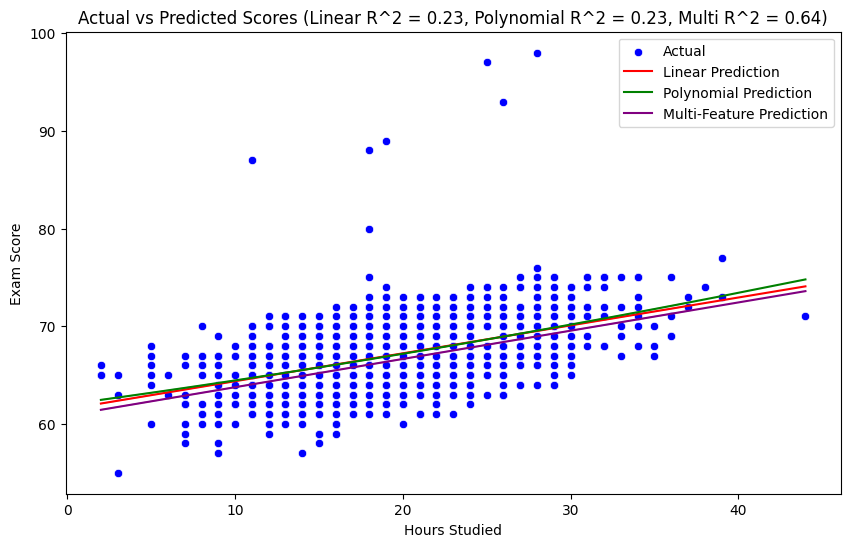

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_simple_test['Hours_Studied'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test_sorted, y=y_pred_lr_sorted, color='red', label='Linear Prediction')
sns.lineplot(x=X_test_sorted, y=y_pred_poly_sorted, color='green', label='Polynomial Prediction')
sns.lineplot(x=X_test_sorted, y=y_pred_multi_sorted, color='purple', label='Multi-Feature Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title(f'Actual vs Predicted Scores (Linear R^2 = {r2_linear:.2f}, Polynomial R^2 = {r2_poly:.2f}, Multi R^2 = {r2_multi:.2f})')
plt.legend()
plt.savefig('predictions_comparison.png')
plt.show()